In [2]:
library(readxl)
library(tidyverse)
library(dplyr)
library(stringr)
library(ggplot2)
library(gridExtra)
library(grid)
library(xml2)
library(jsonlite)

# Import dataset
Cambiare percorso della directory, dati in data su github

In [3]:
# cambia directory
setwd("/home/samu/AdvStats/Project/Data")
files <- list.files(pattern = "\\.xlsx?$", full.names = TRUE)

process_file <- function(file_path) {
  file_name <- tools::file_path_sans_ext(basename(file_path))
  parts <- str_split(file_name, "_")[[1]]
  tipo <- parts[length(parts)]
  paese <- paste(parts[-length(parts)], collapse = "_")

  df <- read_excel(file_path, skip = 6)
  df <- df %>% filter(!is.na(Anno))
  metadata <- read_excel(file_path, n_max = 6 - 2, col_names = FALSE)

  df$paese <- paese
  df$tipo <- tipo

  return(df)
}

df_list <- lapply(files, process_file)
df_finale <- bind_rows(df_list)

cat("nrow:", nrow(df_finale), "\n")
cat("Pesi:", unique(df_finale$paese), "\n")
cat("Tipi:", unique(df_finale$tipo), "\n")
cat("Anni:", unique(df_finale$Anno), "\n") ### !!! 'Medio mensile' è considerato un anno, toglibile se da problemi

New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`
New names:
• `` -> `...1`


nrow: 372 
Pesi: Auronzo Castelfranco PortoTolle Roverchiara 
Tipi: max mean min 
Anni: 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 Medio mensile 


Modifiche ai vari dataframe

In [4]:
### versione senza 'Medio mensile'
df_anni <- df_finale %>% 
  filter(Anno != "Medio mensile") %>%
  mutate(Anno = as.numeric(Anno),Medio = as.numeric(Medio))

# Part 0)

## Annual graphs

In [5]:
df_min <- df_anni %>% 
  filter(tipo == "min")
df_max <- df_anni %>% 
  filter(tipo == "max")
df_mean <- df_anni %>% 
  filter(tipo == "mean")
df_min

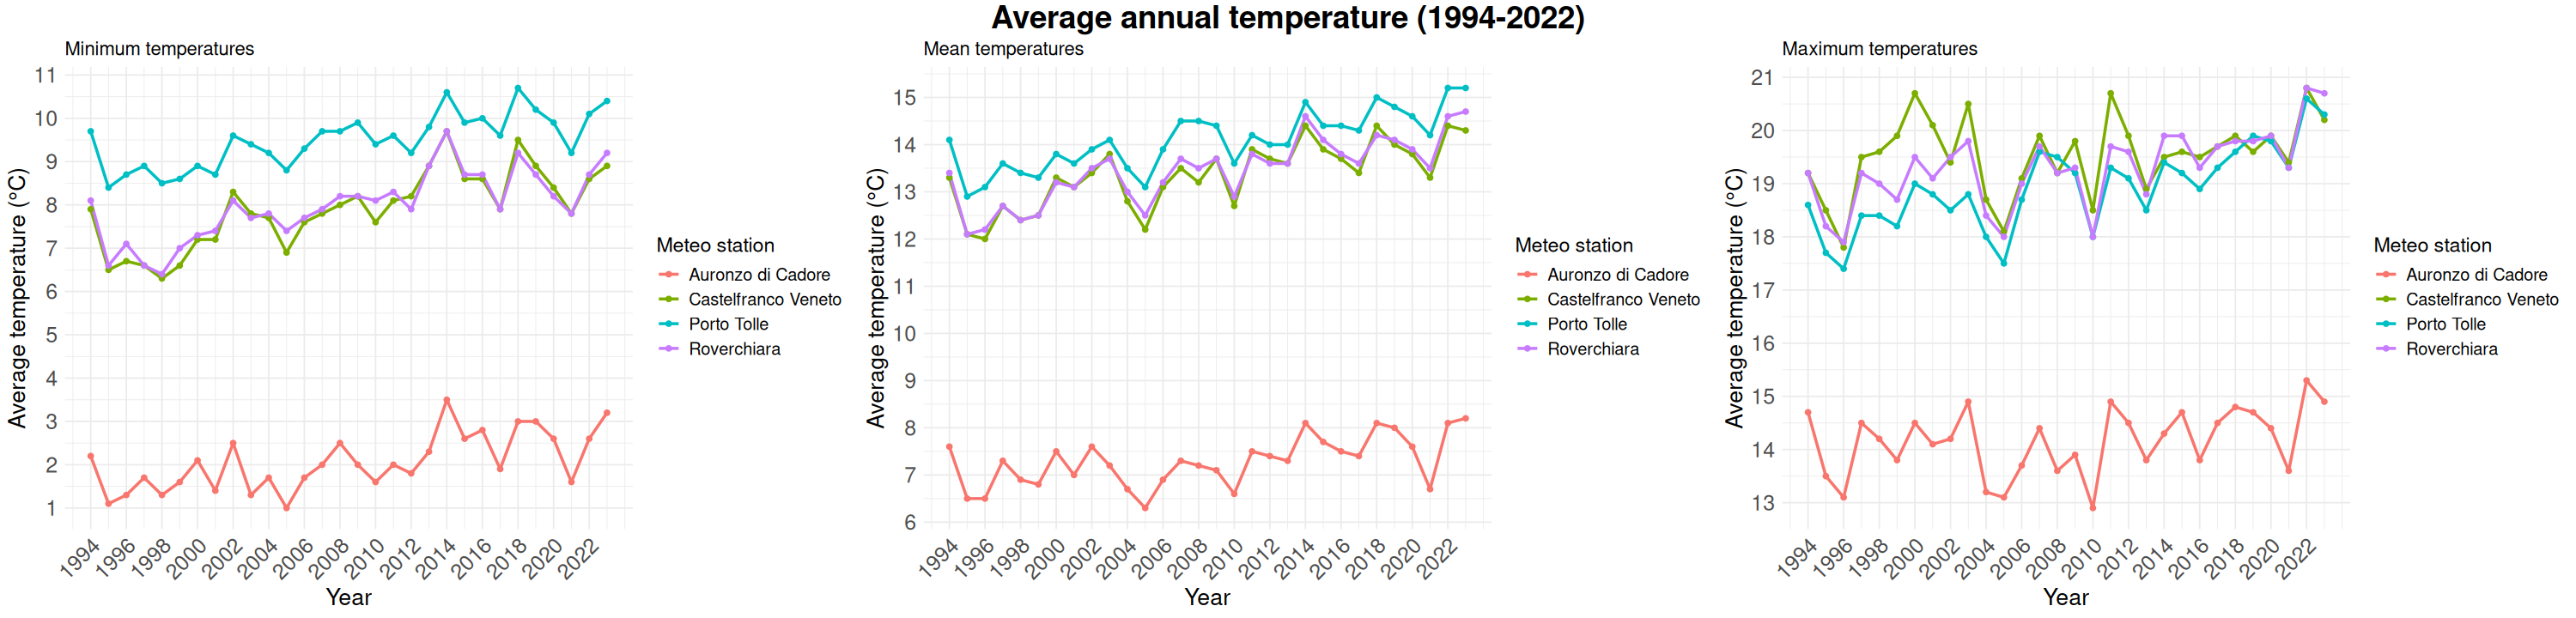

In [7]:

names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df, title, names){
    ggplot(df, aes(x = Anno, y = Medio, color = paese)) +
      geom_line(linewidth = 1) +
      geom_point() +
      scale_color_discrete(labels = names_stat) +
      labs(
        title = title,
        x = "Year",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      scale_x_continuous(breaks=seq(1994,2022,2))+
      scale_y_continuous(breaks=seq(0,21,1))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))+
      theme(legend.position.inside = c(0.8,0.47), legend.title=element_text(size=14), legend.text=element_text(size=12))
}
options(repr.plot.width = 25, repr.plot.height = 6) 
min_plot<-plot_0(df_min,'Minimum temperatures',names_stat)
mean_plot<-plot_0(df_mean,'Mean temperatures',names_stat)
max_plot<-plot_0(df_max, 'Maximum temperatures',names_stat)
grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))

## Monthly graphs

In [22]:
df_long <- df_anni %>%
  pivot_longer(
    cols = GEN:DIC,
    names_to = "mese",
    values_to = "temperatura")%>%
    mutate(mese = factor(mese, levels = c("GEN", "FEB", "MAR", "APR", "MAG", "GIU", 
                                       "LUG", "AGO", "SET", "OTT", "NOV", "DIC")))%>%
    mutate(data = make_date(Anno, mese, 1))
unique(df_long$paese)

[1] "Auronzo"      "Castelfranco" "PortoTolle"   "Roverchiara"

In [6]:
df_min <- df_long %>% 
    filter(tipo == "min")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_max <- df_long %>% 
    filter(tipo == "max")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_mean <- df_long %>% 
    filter(tipo == "mean")#%>%
    #mutate(data = make_date(Anno, mese, 1))
df_mean

Anno Medio paese       tipo mese temperatura data      
1    1994 7.6   Auronzo     mean GEN  -2.2        1994-01-01
2    1994 7.6   Auronzo     mean FEB  -1.6        1994-02-01
3    1994 7.6   Auronzo     mean MAR   5.5        1994-03-01
4    1994 7.6   Auronzo     mean APR   5.9        1994-04-01
5    1994 7.6   Auronzo     mean MAG  11.9        1994-05-01
6    1994 7.6   Auronzo     mean GIU  14.8        1994-06-01
7    1994 7.6   Auronzo     mean LUG  17.5        1994-07-01
8    1994 7.6   Auronzo     mean AGO  17.5        1994-08-01
9    1994 7.6   Auronzo     mean SET  13.1        1994-09-01
10   1994 7.6   Auronzo     mean OTT   6.7        1994-10-01
11   1994 7.6   Auronzo     mean NOV   4.0        1994-11-01
12   1994 7.6   Auronzo     mean DIC  -1.8        1994-12-01
13   1995 6.5   Auronzo     mean GEN  -5.2        1995-01-01
14   1995 6.5   Auronzo     mean FEB  -0.1        1995-02-01
15   1995 6.5   Auronzo     mean MAR   1.3        1995-03-01
16   1995 6.5   Auronzo     mean APR   6.9        1995-04-01
17   1995 6.5   Auronzo     mean MAG  11.0        1995-05-01
18   1995 6.5   Auronzo     mean GIU  13.2        1995-06-01
19   1995 6.5   Auronzo     mean LUG  18.2        1995-07-01
20   1995 6.5   Auronzo     mean AGO  15.0        1995-08-01
21   1995 6.5   Auronzo     mean SET  10.6        1995-09-01
22   1995 6.5   Auronzo     mean OTT   8.0        1995-10-01
23   1995 6.5   Auronzo     mean NOV   1.5        1995-11-01
24   1995 6.5   Auronzo     mean DIC  -2.3        1995-12-01
25   1996 6.5   Auronzo     mean GEN  -1.8        1996-01-01
26   1996 6.5   Auronzo     mean FEB  -3.3        1996-02-01
27   1996 6.5   Auronzo     mean MAR   1.1        1996-03-01
28   1996 6.5   Auronzo     mean APR   7.2        1996-04-01
29   1996 6.5   Auronzo     mean MAG  11.7        1996-05-01
30   1996 6.5   Auronzo     mean GIU  15.8        1996-06-01
⋮    ⋮    ⋮     ⋮           ⋮    ⋮    ⋮           ⋮         
1411 2021 13.5  Roverchiara mean LUG  24.1        2021-07-01
1412 2021 13.5  Roverchiara mean AGO  23.0        2021-08-01
1413 2021 13.5  Roverchiara mean SET  19.5        2021-09-01
1414 2021 13.5  Roverchiara mean OTT  12.7        2021-10-01
1415 2021 13.5  Roverchiara mean NOV   9.1        2021-11-01
1416 2021 13.5  Roverchiara mean DIC   3.4        2021-12-01
1417 2022 14.6  Roverchiara mean GEN   2.4        2022-01-01
1418 2022 14.6  Roverchiara mean FEB   6.1        2022-02-01
1419 2022 14.6  Roverchiara mean MAR   8.1        2022-03-01
1420 2022 14.6  Roverchiara mean APR  12.4        2022-04-01
1421 2022 14.6  Roverchiara mean MAG  20.3        2022-05-01
1422 2022 14.6  Roverchiara mean GIU  24.5        2022-06-01
1423 2022 14.6  Roverchiara mean LUG  26.0        2022-07-01
1424 2022 14.6  Roverchiara mean AGO  24.3        2022-08-01
1425 2022 14.6  Roverchiara mean SET  19.4        2022-09-01
1426 2022 14.6  Roverchiara mean OTT  16.6        2022-10-01
1427 2022 14.6  Roverchiara mean NOV   9.3        2022-11-01
1428 2022 14.6  Roverchiara mean DIC   6.2        2022-12-01
1429 2023 14.7  Roverchiara mean GEN   5.9        2023-01-01
1430 2023 14.7  Roverchiara mean FEB   5.3        2023-02-01
1431 2023 14.7  Roverchiara mean MAR  10.6        2023-03-01
1432 2023 14.7  Roverchiara mean APR  12.6        2023-04-01
1433 2023 14.7  Roverchiara mean MAG  18.0        2023-05-01
1434 2023 14.7  Roverchiara mean GIU  22.9        2023-06-01
1435 2023 14.7  Roverchiara mean LUG  25.3        2023-07-01
1436 2023 14.7  Roverchiara mean AGO  24.4        2023-08-01
1437 2023 14.7  Roverchiara mean SET  21.3        2023-09-01
1438 2023 14.7  Roverchiara mean OTT  16.6        2023-10-01
1439 2023 14.7  Roverchiara mean NOV   8.0        2023-11-01
1440 2023 14.7  Roverchiara mean DIC   5.0        2023-12-01

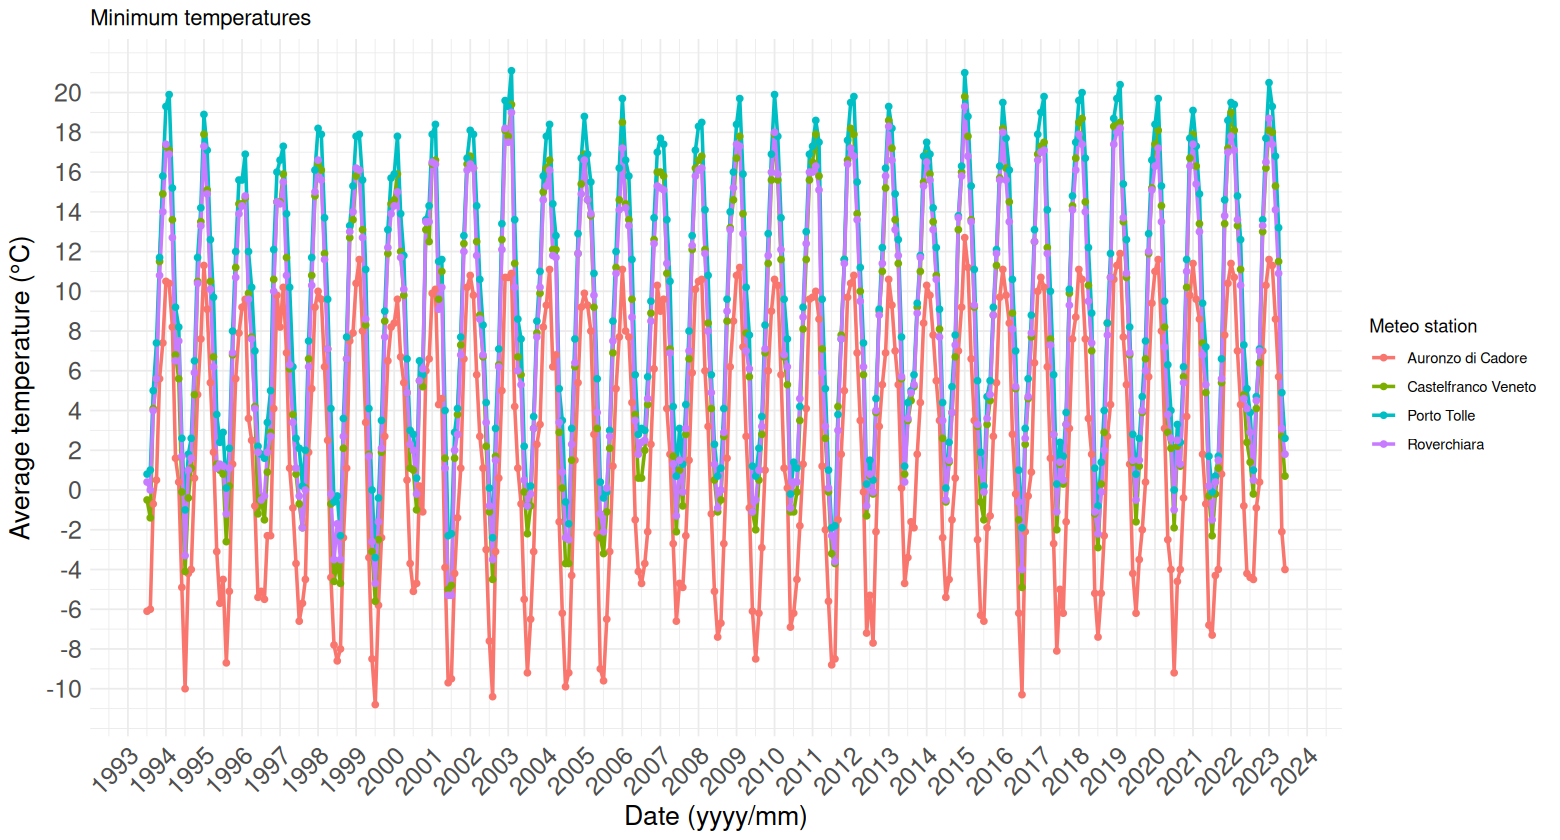

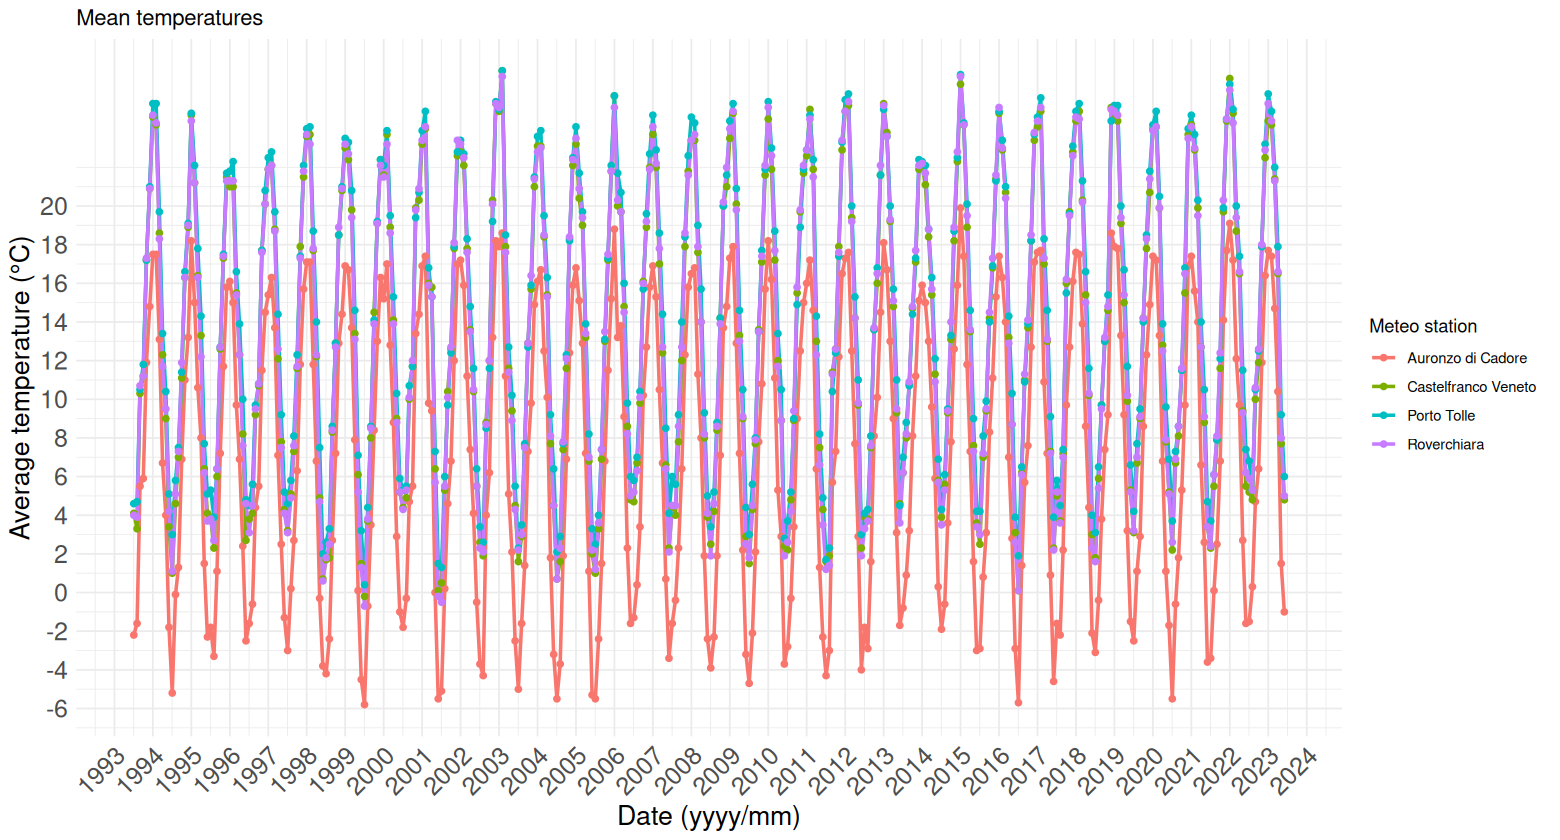

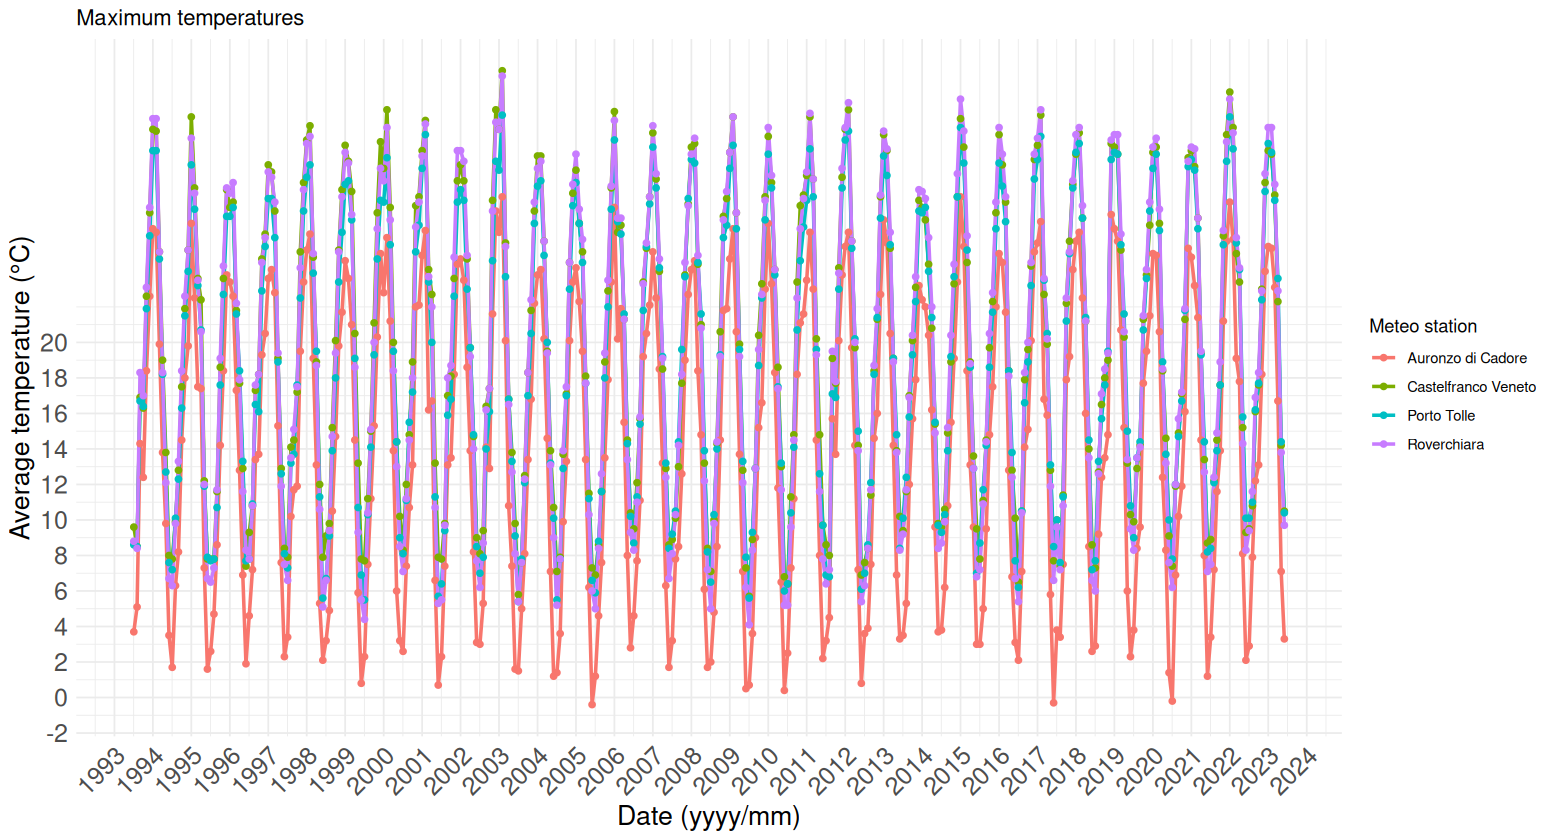

In [15]:
names_stat <- c("Auronzo" = "Auronzo di Cadore", "Castelfranco" = "Castelfranco Veneto",
  "PortoTolle" = "Porto Tolle","Roverchiara" = "Roverchiara")

plot_0<-function(df, title, cue, names){
    ggplot(df, aes(x = data, y = temperatura, color =  .data[[cue]])) +
      geom_line(linewidth = 1) +
      geom_point() +
      scale_color_discrete(labels = names) +
      labs(
        title = title,
        x = "Date (yyyy/mm)",
        y = "Average temperature (°C)",
        color = "Meteo station"
      ) +
      theme_minimal() +
      scale_x_date(date_labels = "%Y",date_breaks = "12 months")+
      scale_y_continuous(breaks=seq(-10,21,2))+
      theme(axis.text.x = element_text(angle = 45, hjust = 1, size=15),
            axis.text.y = element_text(size=15),
            axis.title.x=element_text(size=16),
            axis.title.y=element_text(size=16))#+
      #theme(legend.position = c(0.8,0.47), legend.title=element_text(size=14), legend.text=element_text(size=12))
}
options(repr.plot.width = 13, repr.plot.height = 7) 
min_plot<-plot_0(df_min,'Minimum temperatures','paese',names_stat)
mean_plot<-plot_0(df_mean,'Mean temperatures','paese',names_stat)
max_plot<-plot_0(df_max, 'Maximum temperatures','paese',names_stat)
#grid.arrange(min_plot, mean_plot, max_plot, ncol=3, top = textGrob('Average annual temperature (1994-2022)', 
                #gp = gpar(fontsize = 22, fontface = "bold", col = "black")))
min_plot
mean_plot
max_plot

## Alternative clearer representation (by town not by type)

In [24]:
adc_plot<-plot_0(df_long[df_long$paese == 'Auronzo', ], 'Auronzo','tipo',c('Min', 'Mean', 'Max.'))
cv_plot<-plot_0(df_long[df_long$paese == 'Castelfranco', ], 'Castelfranco Veneto','tipo',c('Min', 'Mean', 'Max.'))
pt_plot<-plot_0(df_long[df_long$paese == 'PortoTolle', ], 'Porto Tolle','tipo',c('Min', 'Mean', 'Max.'))
rov_plot<-plot_0(df_long[df_long$paese == 'Roverchiara', ], 'Roverchiara','tipo',c('Min', 'Mean', 'Max.'))

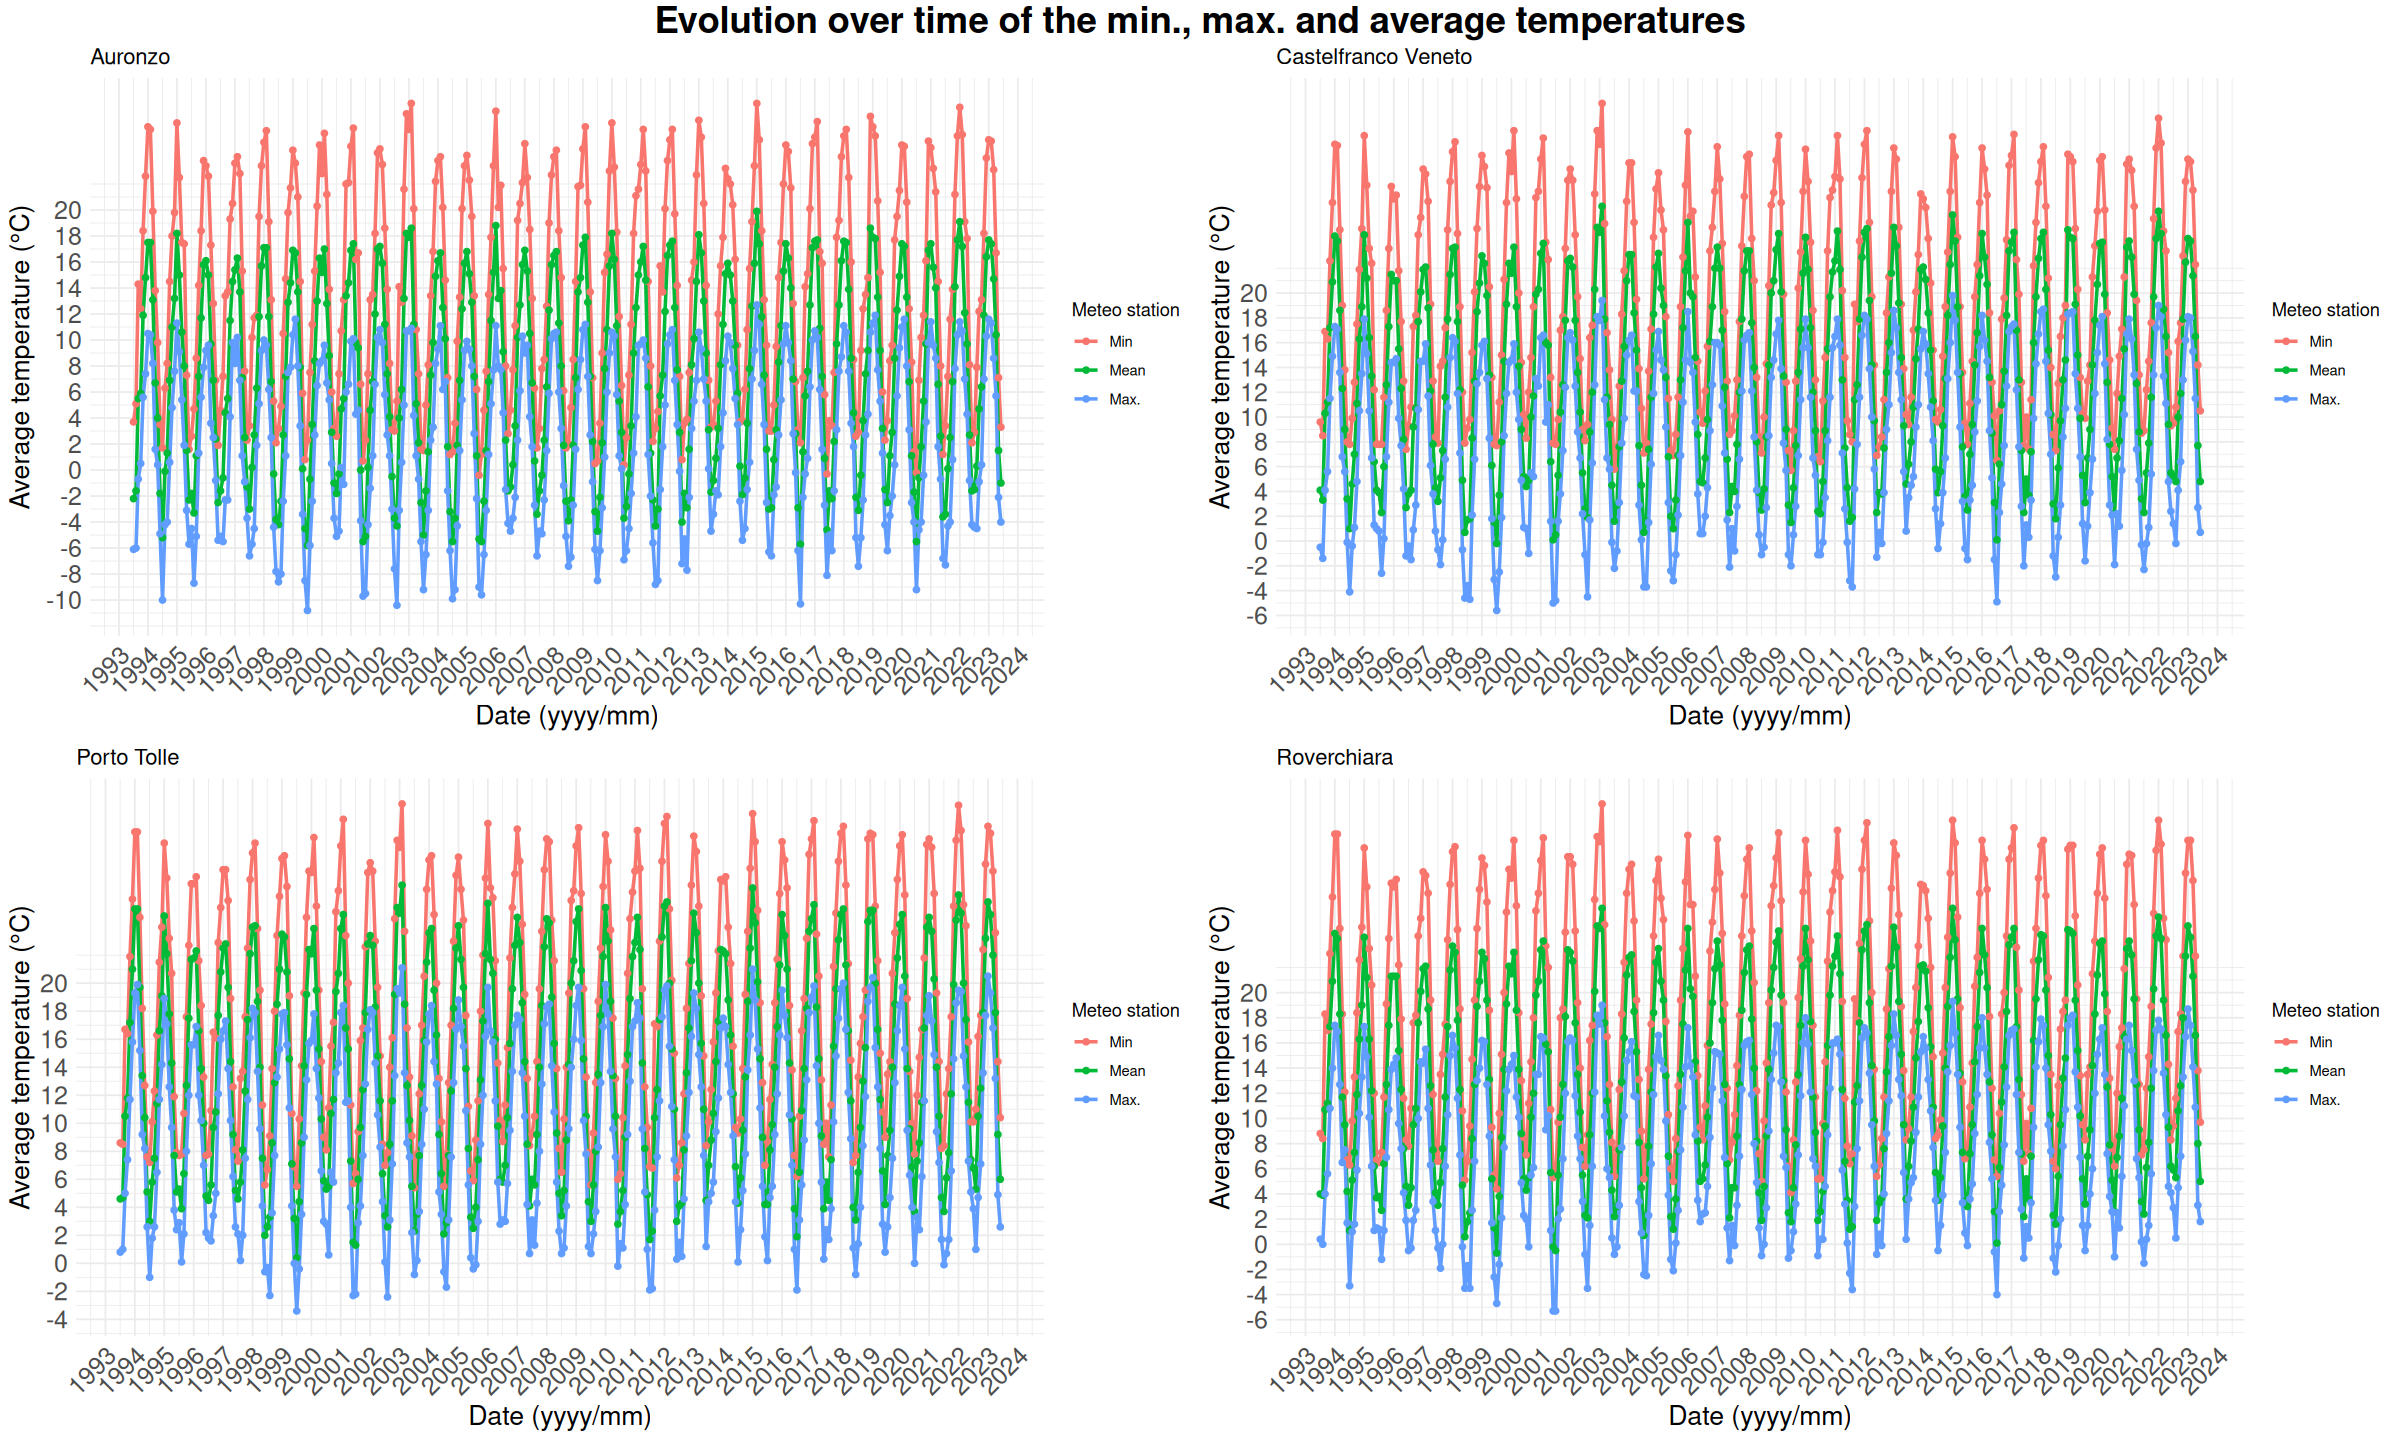

In [33]:
options(repr.plot.width = 20, repr.plot.height = 12) 

grid.arrange(adc_plot, cv_plot, pt_plot, rov_plot, ncol=2,nrow=2, top = textGrob('Evolution over time of the min., max. and average temperatures', 
                gp = gpar(fontsize = 22, fontface = "bold", col = "black")))
